In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d, interp1d


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

path="/Users/chris/data/haloConcentration/cM_planck18.txt"
df = pd.read_csv(path, comment='#', sep='\s+')
z_array = df['z']
M200c = df['M200c']
c200c = df['c200c']

M200cl = np.log10(M200c)

print(np.unique(z_array[ (M200cl > 12-0.05 ) * (M200cl < 12+0.05 ) ]))

print(np.unique( M200cl[(z_array > 4.9 ) * (z_array < 5.1 )] ) )

[0.   0.1  0.2  0.3  0.4  0.5  0.75 1.   1.25 1.5  1.75 2.   4.   6.  ]
[]


In [52]:
def getCold(m, z):
    z = find_nearest(np.unique(z_array), z)
    m2c = interp1d(np.log10(M200c[z_array==z]), c200c[z_array==z])
    return m2c(m)

def getCnew(m, z):
    getC = interp2d(z_array, np.log10(M200c), c200c)
    return getC(z, m)

def getCmeta(m, z, width = 0.1):
    mask = (M200cl > m-width/2 ) & (M200cl < m+width/2)
    zs = z_array[mask]
    uniquez = np.unique(zs)
    meanC = np.zeros_like(uniquez)
    for i, zi in enumerate(uniquez):
        meanC[i] = np.mean(c200c[mask & (z_array == zi)])
    z2c = interp1d(uniquez, meanC, kind = 'quadratic')
    return z2c(z)
        
        

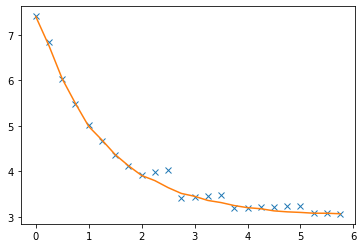

In [51]:
m = [12.267224,   12.20857123, 12.1378665,  12.0606479,  11.98048259, 11.89880288,
 11.81610567, 11.73385188, 11.65220462, 11.57089052, 11.4908133,  11.41186558,
 11.33358755, 11.25655926, 11.1808664,  11.10590293, 11.03189689, 10.95942312,
 10.8876618,  10.81659862, 10.74695516, 10.67815561, 10.60999983, 10.54266154]
z_range = [0., 0.25, 0.5,  0.75, 1., 1.25, 1.5,  1.75, 2.,   2.25, 2.5,  2.75, 3.,   3.25,
 3.5,  3.75, 4.,   4.25, 4.5,  4.75, 5.,   5.25, 5.5,  5.75]

c_old = np.zeros_like(z_range)
c_meta = np.zeros_like(z_range)

for i, z in enumerate(z_range):
    c_old[i] = getCold(m[i], z)
    c_meta[i] = getCmeta(m[i], z, width = .5)
    
plt.figure()
plt.plot(z_range, c_old, 'x')
#plt.plot(z_range, c_new, 'x')
plt.plot(z_range, c_meta )

